# Task 1

In [1]:
#log in dataset
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\237229\Desktop\python_Codes\Hackathon5\heart.txt')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
#distribution of target variable
df['AHD'].value_counts()

AHD
No     164
Yes    139
Name: count, dtype: int64

# Task 2

In [7]:
#check for missing value
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
#strateries for handling missing values
df.dropna()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [9]:
#Feature engineering
def heart_data(df):
    df = df.copy()
    df['Ca'] = df['Ca'].fillna(df['Ca'].median())
    df['Thal'] = df['Thal'].fillna('Unknown')
    return df
heart_data(df)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [10]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,Male,typical,0.757525,-0.264900,1,2,0.017197,0,2.3,3,0.0,fixed,No
1,2,67,Male,asymptomatic,1.611220,0.760415,0,2,-1.821905,1,1.5,2,3.0,normal,Yes
2,3,67,Male,asymptomatic,-0.665300,-0.342283,0,2,-0.902354,1,2.6,2,2.0,reversable,Yes
3,4,37,Male,nonanginal,-0.096170,0.063974,0,0,1.637359,0,3.5,3,0.0,normal,No
4,5,41,Female,nontypical,-0.096170,-0.825922,0,2,0.980537,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,Male,typical,-1.234430,0.334813,0,0,-0.770990,0,1.2,2,0.0,reversable,Yes
299,300,68,Male,asymptomatic,0.700612,-1.038723,1,0,-0.376896,0,3.4,2,2.0,reversable,Yes
300,301,57,Male,asymptomatic,-0.096170,-2.238149,0,0,-1.515388,1,1.2,2,1.0,reversable,Yes
301,302,57,Female,nontypical,-0.096170,-0.206864,0,2,1.068113,0,0.0,2,1.0,normal,Yes


In [12]:
#Create new feature
#combine oldpeak and slope to create a new feature that represent excercise-induced heart stress'
df['Exercise_Heart_Stress'] = df['Oldpeak'] * df['Slope']

In [13]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Exercise_Heart_Stress
0,1,63,Male,typical,0.757525,-0.264900,1,2,0.017197,0,2.3,3,0.0,fixed,No,6.9
1,2,67,Male,asymptomatic,1.611220,0.760415,0,2,-1.821905,1,1.5,2,3.0,normal,Yes,3.0
2,3,67,Male,asymptomatic,-0.665300,-0.342283,0,2,-0.902354,1,2.6,2,2.0,reversable,Yes,5.2
3,4,37,Male,nonanginal,-0.096170,0.063974,0,0,1.637359,0,3.5,3,0.0,normal,No,10.5
4,5,41,Female,nontypical,-0.096170,-0.825922,0,2,0.980537,0,1.4,1,0.0,normal,No,1.4


# Task 3

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Univariable Analysis

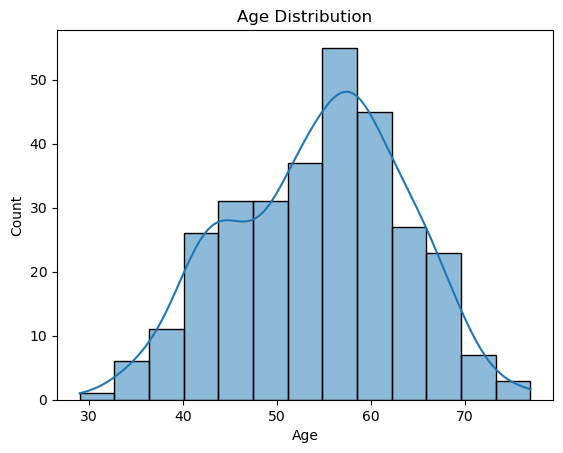

In [16]:
#Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

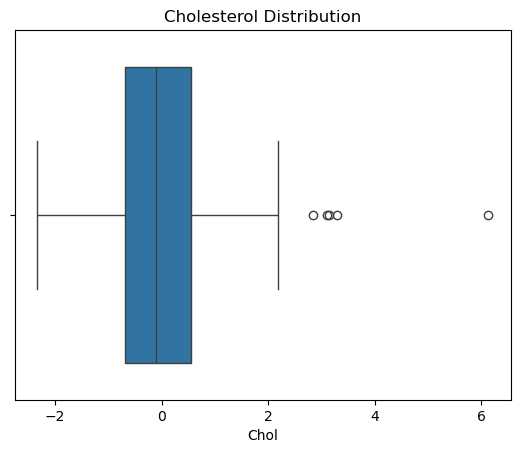

In [17]:
#Cholesterol
sns.boxplot(x=df['Chol'])
plt.title('Cholesterol Distribution')
plt.show()

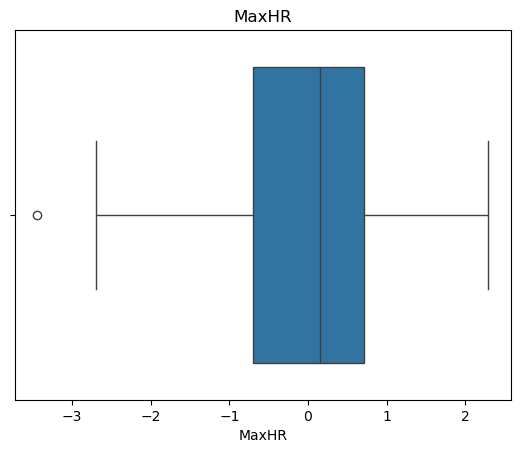

In [18]:
#MaxHR
sns.boxplot(x=df['MaxHR'])
plt.title('MaxHR')
plt.show()

In [19]:
#Bivariate Analysis

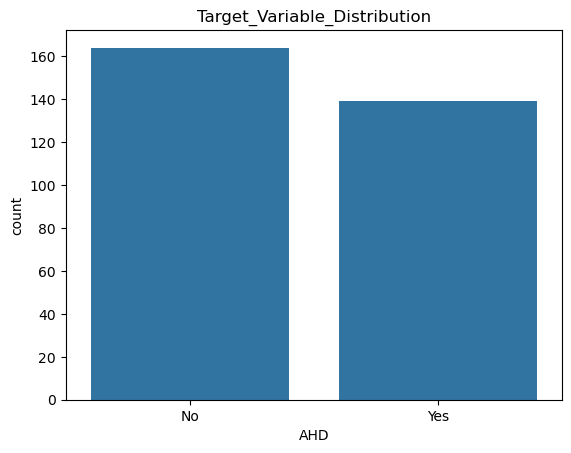

In [20]:
sns.countplot(x=df['AHD'])
plt.title('Target_Variable_Distribution')
plt.show()

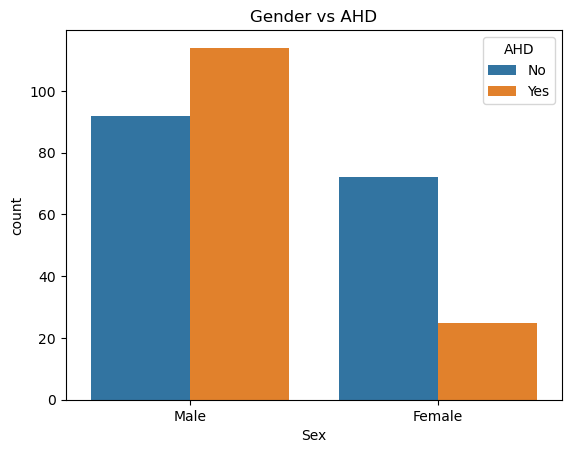

In [21]:
#Gender vs AHD
sns.countplot(x='Sex', hue='AHD', data=df)
plt.title('Gender vs AHD')
plt.show()

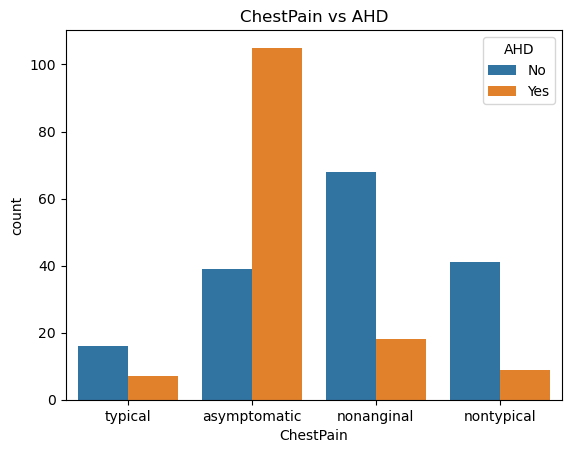

In [22]:
#ChestPain vs AHD
sns.countplot(x='ChestPain', hue='AHD', data=df)
plt.title('ChestPain vs AHD')
plt.show()

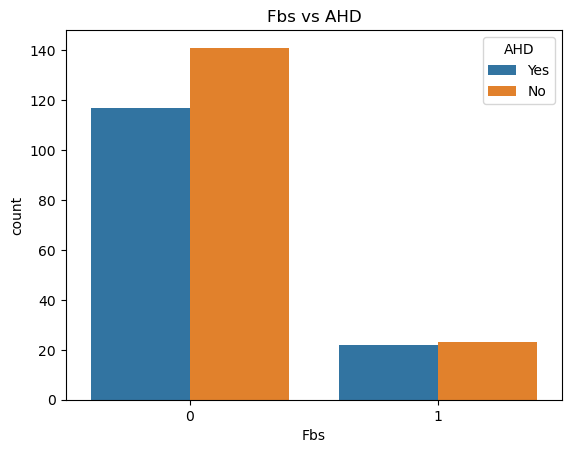

In [23]:
sns.countplot(x='Fbs', hue='AHD', data=df)
plt.title('Fbs vs AHD')
plt.show()

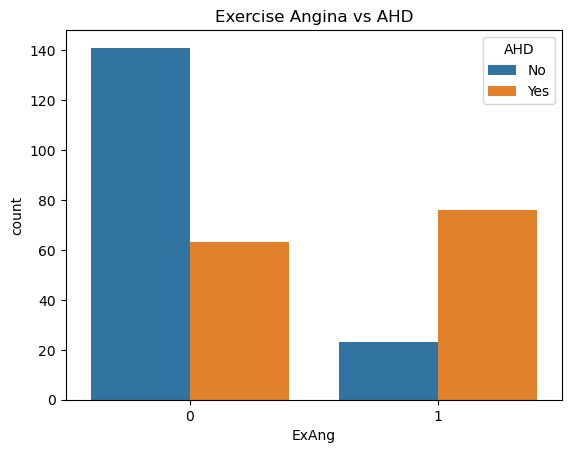

In [24]:
#Exercise Angina vs AHD
sns.countplot(x='ExAng', hue='AHD', data=df)
plt.title('Exercise Angina vs AHD')
plt.show()

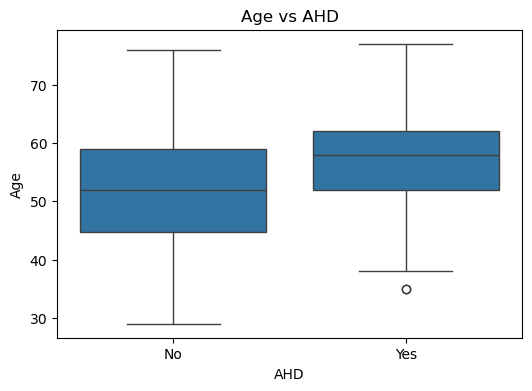

In [25]:
# Boxplot for Age vs AHD
plt.figure(figsize=(6, 4))
sns.boxplot(x='AHD', y='Age', data=df)
plt.title('Age vs AHD')
plt.show()

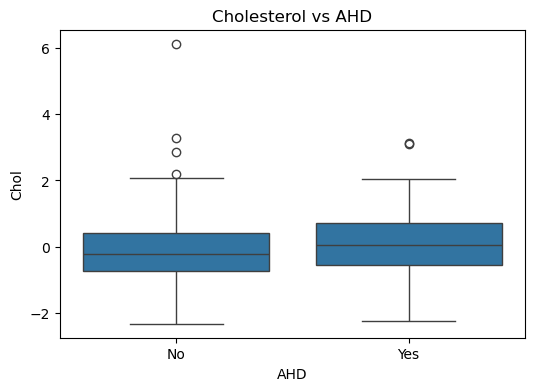

In [26]:
# Boxplot for Cholesterol vs AHD
plt.figure(figsize=(6, 4))
sns.boxplot(x='AHD', y='Chol', data=df)
plt.title('Cholesterol vs AHD')
plt.show()

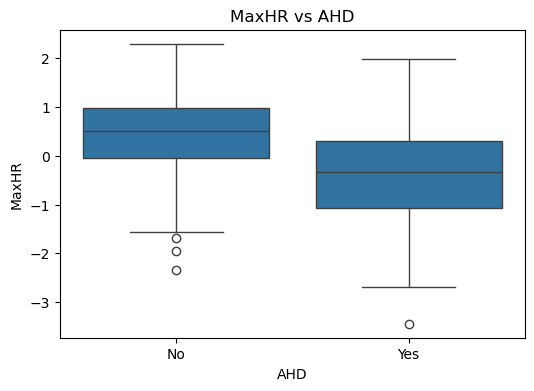

In [27]:
# Boxplot for MaxHR vs AHD
plt.figure(figsize=(6, 4))
sns.boxplot(x='AHD', y='MaxHR', data=df)
plt.title('MaxHR vs AHD')
plt.show()

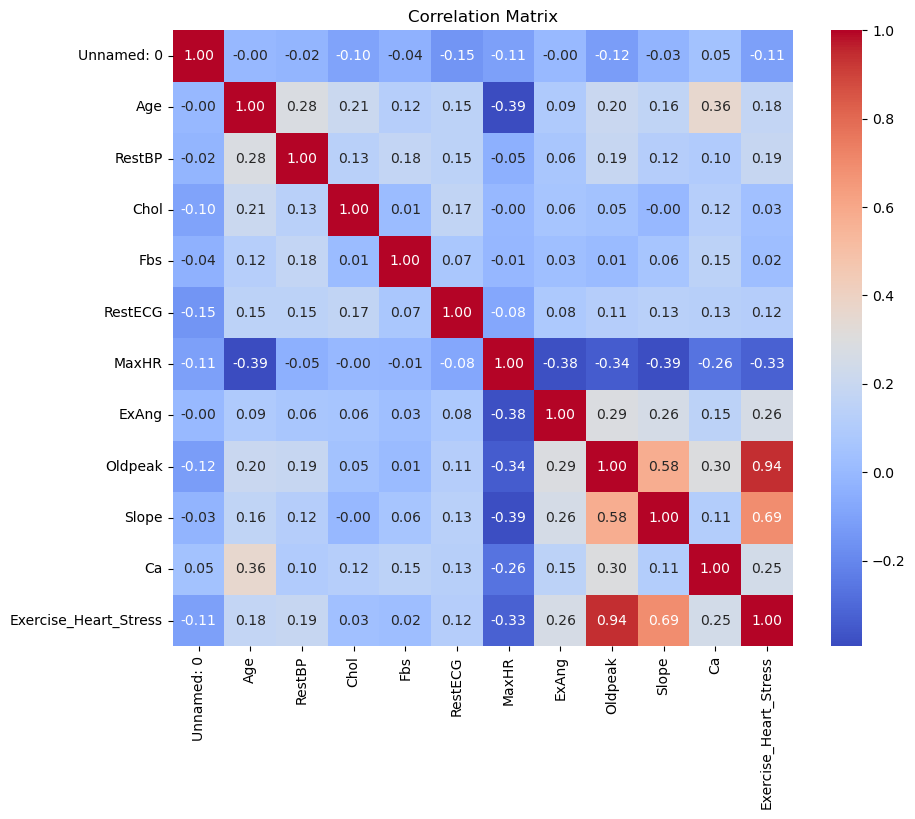

In [28]:
# Compute correlation matrix
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

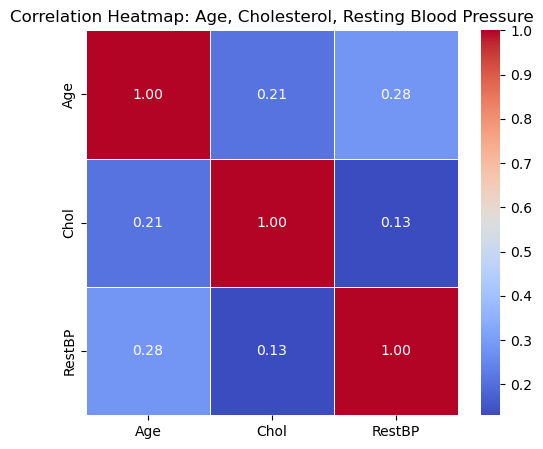

In [29]:
#Visualizing correlations
relevant_columns = ['Age', 'Chol', 'RestBP']
correlation_matrix = df[relevant_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Age, Cholesterol, Resting Blood Pressure')
plt.show()

# Task 4

In [30]:
# Survival by Gender
gender_survival_rate = df.groupby('Sex')['AHD'].value_counts()
print("Survival by Gender (Male vs Female):")
print(gender_survival_rate)

Survival by Gender (Male vs Female):
Sex     AHD
Female  No      72
        Yes     25
Male    Yes    114
        No      92
Name: count, dtype: int64


In [31]:
# Survival by Chest pain type
gender_survival_rate = df.groupby('ChestPain')['AHD'].value_counts()
print("Survival by Chest Pain Type:")
print(gender_survival_rate)

Survival by Chest Pain Type:
ChestPain     AHD
asymptomatic  Yes    105
              No      39
nonanginal    No      68
              Yes     18
nontypical    No      41
              Yes      9
typical       No      16
              Yes      7
Name: count, dtype: int64


In [32]:
# Survival by Maximum heart rate achieved
gender_survival_rate = df.groupby('MaxHR')['AHD'].value_counts()
print("Survival by Maximum heart rate achieved:")
print(gender_survival_rate)

Survival by Maximum heart rate achieved:
MaxHR      AHD
-3.442067  Yes    1
-2.697668  Yes    1
-2.610092  Yes    1
-2.391151  Yes    1
-2.347363  No     1
                 ..
 1.768724  No     1
 1.856300  No     1
 1.943876  No     1
 1.987664  Yes    1
 2.294182  No     1
Name: count, Length: 138, dtype: int64


In [33]:
average_cholesterol = df.groupby(['AHD', 'ChestPain'])['Chol'].mean().unstack()
 
print("Average Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type:")
print(average_cholesterol)

Average Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type:
ChestPain  asymptomatic  nonanginal  nontypical   typical
AHD                                                      
No            -0.026305   -0.027348   -0.116270 -0.325355
Yes            0.111141   -0.148827    0.324065  0.135829


In [34]:
average_cholesterol.index = ['No Heart Disease', 'Heart Disease']
print("\nAverage Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type (with labels):")
print(average_cholesterol)


Average Cholesterol Levels by Heart Disease Status (Original) and Chest Pain Type (with labels):
ChestPain         asymptomatic  nonanginal  nontypical   typical
No Heart Disease     -0.026305   -0.027348   -0.116270 -0.325355
Heart Disease         0.111141   -0.148827    0.324065  0.135829


# Task 5


Insight 5: Individuals experiencing exercise-induced angina have a higher prevalence of heart disease.
Heart Disease Prevalence by Exercise-Induced Angina (%):
 No Exercise Angina    30.882353
Exercise Angina       76.767677
Name: AHD, dtype: float64


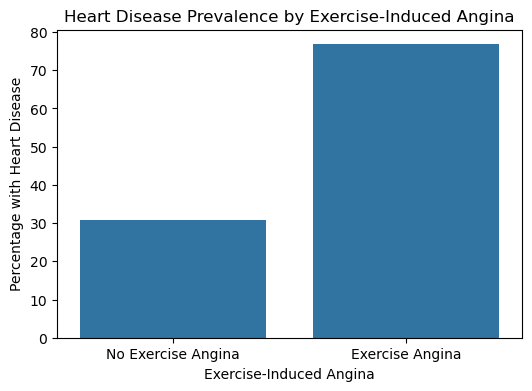

In [35]:
# Insight 5: Exercise-Induced Angina and Heart Disease
print("\nInsight 5: Individuals experiencing exercise-induced angina have a higher prevalence of heart disease.")
exang_heart_disease = df.groupby('ExAng')['AHD'].apply(lambda x: (x == 'Yes').mean() * 100)
# Assuming ExAng is 0 for No, 1 for Yes
exang_labels = ['No Exercise Angina', 'Exercise Angina']
exang_heart_disease.index = exang_labels
print("Heart Disease Prevalence by Exercise-Induced Angina (%):\n", exang_heart_disease)
 
plt.figure(figsize=(6, 4))
sns.barplot(x=exang_heart_disease.index, y=exang_heart_disease.values)
plt.title('Heart Disease Prevalence by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Percentage with Heart Disease')
plt.show()